# NAIVE BAYES - ROC AUC SCORE
# WESLEY ALDRICH
# 2702363613
# PPTI 17

In [460]:
import pandas as pd

df = pd.read_csv('adult.data')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# DATA ANALYSIS

## Check the count of unique values from categorical columns

In [461]:
# Print out the amount of unique values from every categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()}")

workclass: 9
education: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native-country: 42
income: 2


In [462]:
# Print out all the unique values for each categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex: [' Male' ' Female']
native-country: [' United-States' ' Cuba' ' Jamaica' ' 

## Check the count of '?', placeholder for incomplete data

In [463]:
for col in df.columns:
    question_mark_count = df.replace(' ?', pd.NA)[col].isna().sum()
    print(f"'{col}': {question_mark_count} occurrences of '?'")

'age': 0 occurrences of '?'
'workclass': 1836 occurrences of '?'
'fnlwgt': 0 occurrences of '?'
'education': 0 occurrences of '?'
'education-num': 0 occurrences of '?'
'marital-status': 0 occurrences of '?'
'occupation': 1843 occurrences of '?'
'relationship': 0 occurrences of '?'
'race': 0 occurrences of '?'
'sex': 0 occurrences of '?'
'capital-gain': 0 occurrences of '?'
'capital-loss': 0 occurrences of '?'
'hours-per-week': 0 occurrences of '?'
'native-country': 583 occurrences of '?'
'income': 0 occurrences of '?'


> As we can see, luckily, every incomplete columns are from categorical columns. The counts are also relatively low (1843 at most from 32561) It shouldn't be much of a problem. We'll figure out what to do when pre-processing.

## Check the count of NaN, which is different from '?'

In [464]:
for col in df.columns:
  nan_count = df[col].isna().sum()
  print(f"{col} NaN count: {nan_count}")

age NaN count: 0
workclass NaN count: 0
fnlwgt NaN count: 0
education NaN count: 0
education-num NaN count: 0
marital-status NaN count: 0
occupation NaN count: 0
relationship NaN count: 0
race NaN count: 0
sex NaN count: 0
capital-gain NaN count: 0
capital-loss NaN count: 0
hours-per-week NaN count: 0
native-country NaN count: 0
income NaN count: 0




> If there are in fact some NaN values in our dataset, by intuition, I would assume this has to be a misinput from the Data Engineer. Thus, we would drop them during pre-processing. In this case, we are safe.



## Visualize the distribution

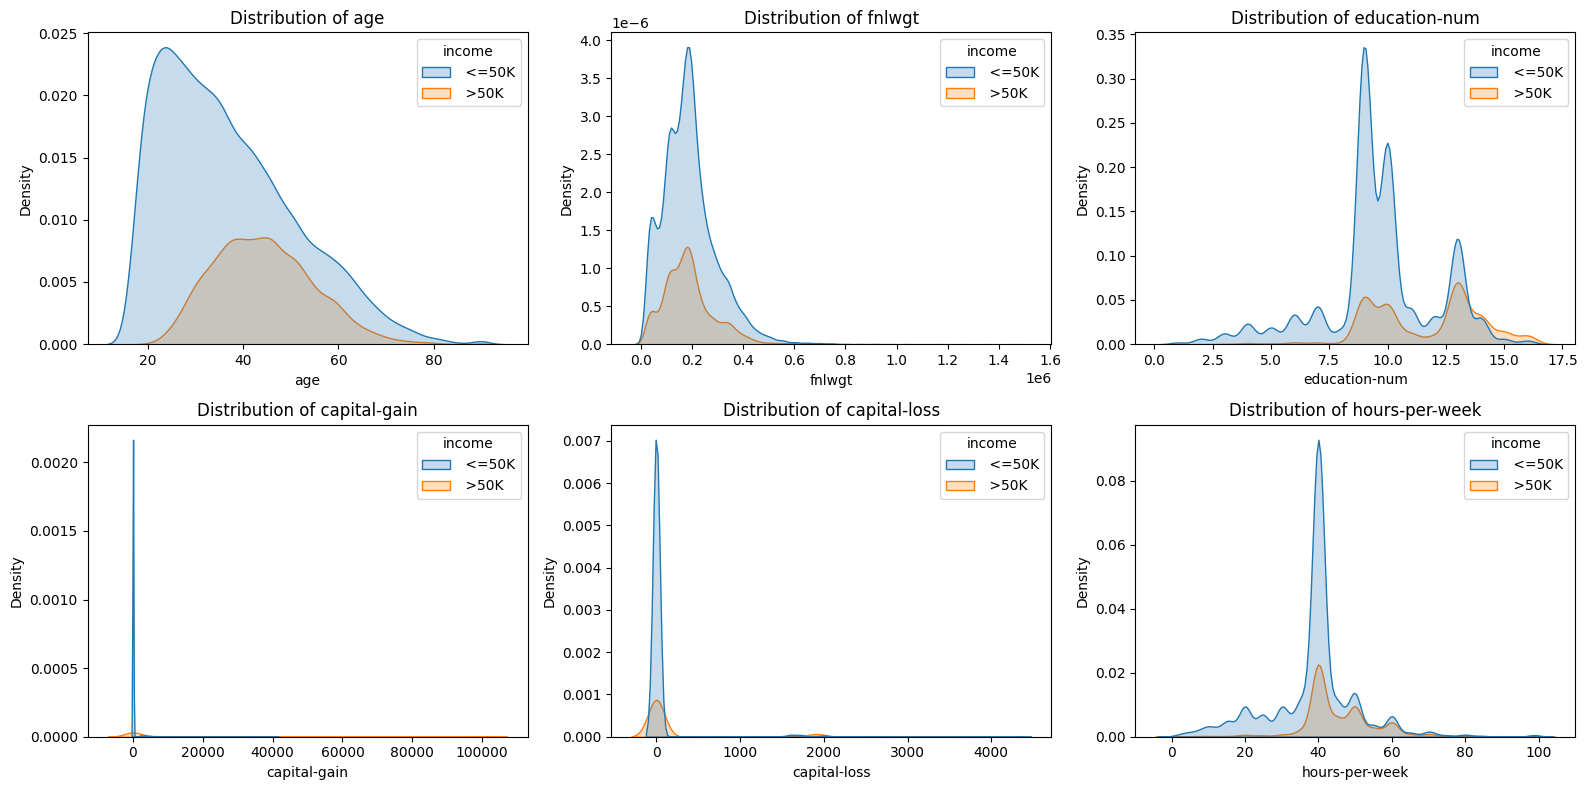

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
hue = "income"

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.kdeplot(data=df, x=column, hue=hue, ax=axes[i], fill=True)
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

# PRE-PROCESSING

In [466]:
# # drop all rows with any categorical column contains '?'

# original_size = len(df)
# df = df.replace(' ?', pd.NA).dropna()
# print(f"Dropped {original_size - len(df)} rows")

In [467]:
# # drop ' Holand-Netherlands' since it's causing issues

# original_size = len(df)
# df = df[df['native-country'] != ' Holand-Netherlands']
# print(f"Dropped {original_size - len(df)} rows")

In [468]:
X = df.drop('income', axis=1)
y = df['income']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print(f"Train count: {len(df_train)}")
print(f"Test count: {len(df_test)}")

Train count: 22792
Test count: 9769


In [469]:
# # define what columns to apply manual one hot encoder
# c_onehot = ['sex', 'workclass', 'occupation', 'marital-status', 'relationship', 'race', 'native-country']
# # c_onehot = ['sex', 'workclass', 'occupation']

# # make manual OneHotEncoder
# def onehot_encode(df_target, col):
#     df_encoded = pd.get_dummies(df_target[col], prefix=col)
#     df_target = df_target.drop(col, axis=1)
#     df_target = pd.concat([df_target, df_encoded], axis=1)
#     return df_target

# # encode the columns in c_onehot with my encoder
# for col in c_onehot:
#     df_train = onehot_encode(df_train, col)
#     df_test = onehot_encode(df_test, col)

In [470]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.drop('education', axis=1).columns:
    if df[col].dtype == 'object':
        # I do the fitting from both train and test to ensure even unseen data
        # on training process will still be encoded properly.
        le.fit(pd.concat([df_train[col], df_test[col]]))

        df_train[col] = le.transform(df_train[col])
        df_test[col] = le.transform(df_test[col])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 27371 to 21301
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       22792 non-null  int64 
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  int64 
 6   occupation      22792 non-null  int64 
 7   relationship    22792 non-null  int64 
 8   race            22792 non-null  int64 
 9   sex             22792 non-null  int64 
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22792 non-null  int64 
 14  income          22792 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 2.8+ MB


In [471]:
# # encode income manually
# def income(income):
#     if income == ' <=50K':
#         return 0
#     else:
#         return 1

# df_train['income'] = df_train['income'].apply(income)
# df_test['income'] = df_test['income'].apply(income)

In [472]:
# encode education manually
edu_order = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th',
             ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad',
             ' Some-college', ' Assoc-voc', ' Assoc-acdm',
             ' Bachelors', ' Masters', ' Prof-school',
             ' Doctorate']

def education(education):
    return edu_order.index(education)

df_train['education'] = df_train['education'].apply(education)
df_test['education'] = df_test['education'].apply(education)

In [473]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22792 entries, 27371 to 21301
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             22792 non-null  int64
 1   workclass       22792 non-null  int64
 2   fnlwgt          22792 non-null  int64
 3   education       22792 non-null  int64
 4   education-num   22792 non-null  int64
 5   marital-status  22792 non-null  int64
 6   occupation      22792 non-null  int64
 7   relationship    22792 non-null  int64
 8   race            22792 non-null  int64
 9   sex             22792 non-null  int64
 10  capital-gain    22792 non-null  int64
 11  capital-loss    22792 non-null  int64
 12  hours-per-week  22792 non-null  int64
 13  native-country  22792 non-null  int64
 14  income          22792 non-null  int64
dtypes: int64(15)
memory usage: 2.8 MB


# TRAINING

In [474]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

g = ['age', 'education-num', 'hours-per-week']
m = ['fnlwgt', 'capital-gain', 'capital-loss']

# c is the list of columns that are not in g and m
c = [col for col in df_train.columns if col not in g + m + ['income']]

x_g = df_train[g]
x_g_test = df_test[g]
x_m = df_train[m]
x_m_test = df_test[m]
x_c = df_train[c]
x_c_test = df_test[c]

# Define pipelines for each model
pipeline_gnb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

pipeline_mnb = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('mnb', MultinomialNB())
])

pipeline_cnb = Pipeline(steps=[
    ('cnb', CategoricalNB())
])

# Fit the models
pipeline_gnb.fit(x_g, y_train)
pipeline_mnb.fit(x_m, y_train)
pipeline_cnb.fit(x_c, y_train)

# Predict with the models
y_pred_gnb = pipeline_gnb.predict_proba(x_g_test)
y_pred_mnb = pipeline_mnb.predict_proba(x_m_test)
y_pred_cnb = pipeline_cnb.predict_proba(x_c_test)

# Ensemble predictions (soft-voting)
y_pred = (y_pred_gnb + y_pred_mnb + y_pred_cnb) / 3
print(f"Ensemble (soft-voting): {roc_auc_score(y_test, y_pred[:, 1])}")

# Alternative predictions (argmax and argmean)
y_pred_argmax = (y_pred_gnb + y_pred_mnb + y_pred_cnb).argmax(axis=1)
print(f"Ensemble (argmax): {roc_auc_score(y_test, y_pred_argmax)}")

y_pred_argmean = (y_pred_gnb + y_pred_mnb + y_pred_cnb).mean(axis=1)
print(f"Ensemble (argmean): {roc_auc_score(y_test, y_pred_argmean)}")

# Model-specific performance
print(f"\nDetails:")
print(f"GNB: {roc_auc_score(y_test, y_pred_gnb[:, 1])}")
print(f"MNB: {roc_auc_score(y_test, y_pred_mnb[:, 1])}")
print(f"CNB: {roc_auc_score(y_test, y_pred_cnb[:, 1])}")


Ensemble (soft-voting): 0.8918331916431315
Ensemble (argmax): 0.6933437605307359
Ensemble (argmean): 0.5160336932715002

Details:
GNB: 0.8160501612195361
MNB: 0.6393077789595885
CNB: 0.8774925316613774
